# CSE-518 AI Assignment 1

- AU1841040 
- Kaushal Patil

## Excercise 1

Given to you is the initial state and final state of board for an 8-puzzle problem. Find the optimal cost path to reach the given final state from the given initial state using the A* Algorithm.

   2 8 3     
   1 6 4  
   7 5 _     
   Initial State

   1 2 3     
   8 4 _     
   7 6 5          
Final State

### Start by making helper classes for the problem

In [1]:
from typing import List,Union
class Node:
    def __init__(self, state:List[List[Union[int, str]]], moves:int, f_val:int ):
        """
        Args:
            state: list representing the state of the node
            moves: the moves made so far
            f_val: The cost of the node f(n) = g(n) + h(n) 
        """
        self.state = state
        self.moves = moves
        self.f_val = f_val
    
    def generatenextnodes(self):
        "generate nodes with the blank space moved"
        x,y = self.getblankpos()
        all_moves = [(x-1,y), (x+1,y), (x, y-1), (x, y+1)] 
        
        child_nodes = []
        for move in all_moves:
            x_,y_ = move
            # check if not going out of 3x3 matrix
            if x_<0 or x_>2 or y_<0 or y_>2:
                continue
            # create duplicare
            next_state = self.copystate()
            # change state
            next_state[x][y] = self.state[x_][y_]
            next_state[x_][y_] = "_"
            # generated all child states and appended to list
            child_nodes.append(Node(next_state,moves=self.moves+1, f_val=0))
        return child_nodes
        
    
    def getblankpos(self):
        for i in range(3):
            for j in range(3):
                if self.state[i][j] == "_":
                    return (i,j)
    
    def copystate(self):
        state = []
        for row in self.state:
            state.append(row.copy())
        return state
    
    def __repr__(self):
        output = ""
        for row in self.state:
            for x in row:
                output += str(x) + " "
            output += "\n"
        return output

In [2]:
n = Node([[1,2,3],[4,5,6],[7,8,'_']],0,0)
print(n)
n.generatenextnodes()

1 2 3 
4 5 6 
7 8 _ 



[1 2 3 
 4 5 _ 
 7 8 6 ,
 1 2 3 
 4 5 6 
 7 _ 8 ]

### Define the heuristic function


In [3]:
def h(current_node, goal_state):
    """Calculate different between puzzles i.e cost"""
    temp = 0
    for i in range(3):
        for j in range(3):
            if current_node.state[i][j] != goal_state[i][j] and current_node.state[i][j] != "_":
                temp += 1
    return temp

In [4]:
c_s = Node([[2,8,3],[1,6,4],[7,'_',5]],0,0)
g_s = [[1,2,3],[8,"_",4],[7,6,5]]
print(h(c_s,g_s))

4


### A* Search (informed search)

In [5]:
def astar_search(startparam,goal):
    pathlist = []
    start = Node(startparam,moves=0,f_val=0)
    start.f_val = h(start,goal)

    cur = start

    while True:
        pathlist.append(cur)
        # goal state reached
        if h(cur,goal) == 0:
            break
    
    # explore and select best action
        frontier = []
    # check in all adjacent states
        for node in cur.generatenextnodes():
            #compute full cost
            node.f_val = h(node, goal) + node.moves
            frontier.append(node)
        
        frontier.sort(key = lambda node:node.f_val)
        cur = frontier[0]
        
    for node in pathlist:
        print(node)

In [6]:
start = [[2,8,3],[1,6,4],[7,"_",5]] 
end = [[1,2,3],[8,"_",4],[7,6,5]]
astar_search(start,end)

2 8 3 
1 6 4 
7 _ 5 

2 8 3 
1 _ 4 
7 6 5 

2 _ 3 
1 8 4 
7 6 5 

_ 2 3 
1 8 4 
7 6 5 

1 2 3 
_ 8 4 
7 6 5 

1 2 3 
8 _ 4 
7 6 5 



## Excercise 2

a) Apply BFS and DFS algorithms on the following search space to find the path between start

and goal states. Also compute the cost of both searches in terms of number of nodes visited.

![Excercise 2 Graph Image](ex2.png)

In [7]:
# lets make the above graph
# adjacency list
graph={
    "A":["B","C","D"],
    "B":["E","F"],
    "C":["G","H"],
    "D":["I","J"],
    "E":["K","L"],
    "F":["M"],
    "G":["N"],
    "H":["O"],
    "I":["P","Q"],
    "J":["R"],
    "K":["S"],
    "L":["T"],
    "P":["U"],
}

b) Write a function bfs(T, s, g) that performs BFS on the given problem’s search space T and
return the path from starting state s to goal state g.

In [8]:
def bfs(graph,start,end):
    visited = [] # List to keep track of visited nodes.
    queue = []     #Initialize a queue
    visited.append(start)
    queue.append(start)

    while queue:
        s = queue.pop(0) 

        for neighbour in graph[s]:
            if neighbour==end:
                return len(visited),visited
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

c) Write a function dfs(T, s, g) that performs DFS on the given problem’s search space T and
return the path from starting state s to goal state g.

In [9]:
def dfs(graph,start,end):       
        visited = []
 
        # Create a stack for DFS
        stack = []
 
        # Push the current source node.
        stack.append(start)
 
        while (len(stack)):
            # Pop a vertex from stack and print it
            s = stack[-1]
            stack.pop()
 
            # Stack may contain same vertex twice. So
            # we need to print the popped item only
            # if it is not visited.
            if s not in visited:
#                 print(s,end=' ')
                visited.append(s)
 
            # Get all adjacent vertices of the popped vertex s
            # If a adjacent has not been visited, then push it
            # to the stack.
            if s not in graph.keys():
                continue
            for node in graph[s]:
                if node==end:
                    return len(visited),visited
                if node not in visited:
                    stack.append(node)

d) Use the above graph as test case and verify your results.

In [10]:
# bfs cost and path
ans=bfs(graph,"A","N")
print("cost: ",ans[0])
print("path: ",ans[1])

cost:  13
path:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']


In [11]:
# bfs cost and path
ans=dfs(graph,"A","N")
print("cost: ",ans[0])
print("path: ",ans[1])

cost:  12
path:  ['A', 'D', 'J', 'R', 'I', 'Q', 'P', 'U', 'C', 'H', 'O', 'G']


## Excercise 3


Distance between the nodes is marked on the respective edges. The numbers written on nodes
represent the heuristic value. Find the optimal cost path to reach from start state A to final
state J using A* Algorithm.

![Excercise 3 Graph Image](ex3.png)

### Start by making the graph specified in the problem


In [12]:
from typing import Dict,List
# heuristic weighted graph created using dictionary (Hashmap)
h_w_graph:Dict[str,List]={
    "A":[{"B":6,"F":3},10],
    "B":[{"A":6,"D":2,"C":5},8],
    "C":[{"D":1,"E":5,"B":3},5],
    "D":[{"C":1,"E":8,"B":2},7],
    "E":[{"C":5,"D":8,"I":5,"J":5},3],
    "F":[{"A":3,"G":1,"H":7},6],
    "G":[{"I":3,"F":1},5],
    "H":[{"I":2,"F":7},3],
    "I":[{"G":3,"H":2,"E":5,"J":3},1],
    "J":[{"E":5,"I":3},0]
}
            

In [13]:
def search(start,end,graph):
    # maintain a list of visited nodes
    visited=[start]
    # path to be returned
    path=[]
    cur=start
    # total actual cost
    totprevcost=0
    # iteration
    while True:
        path.append(cur)
        #goal state
        if cur==end:
            break
        # to select best next state
        frontier=[]
        # iteration on all connected nodes to current node
        for node,stepcost in graph[cur][0].items():
            if node not in visited:
                # full cost calculation
                fcost=totprevcost+stepcost+graph[node][1]
                frontier.append((node,fcost,stepcost))
                visited.append(node)
        # finding the smallest full cost for all connected nodes
        frontier.sort(key=lambda x:x[1])
        # selecting smallest full cost node as the next node on path
        cur = frontier[0][0]
        totprevcost+=frontier[0][2]
    return path,totprevcost    

In [14]:
ans=search("A","J",h_w_graph)
print("cost: ",ans[1])
print("path: ",ans[0])

cost:  10
path:  ['A', 'F', 'G', 'I', 'J']


## Excercise 4

Implement a simple system that automatically counts the number of regions in the sample
binary images attached with this. Output of the program should be the number of regions
along with a labelled image. You may use DFS or BFS algorithms to find the neighbours.

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

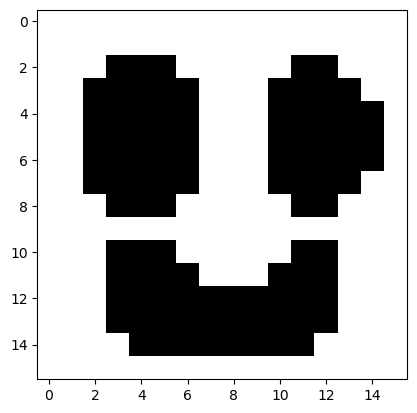

In [16]:
img1 = mpimg.imread('ex4bin1.png')
imgplot1 = plt.imshow(img1,cmap="gray")
plt.show()

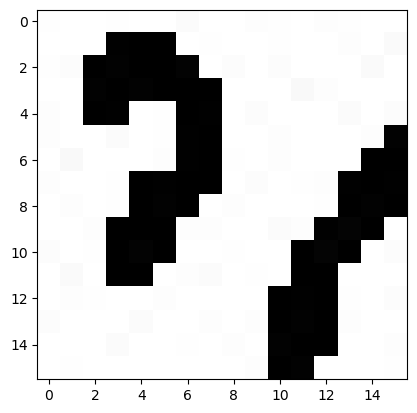

In [17]:
img2 = mpimg.imread('ex4bin2.jpeg')
imgplot2 = plt.imshow(img2,cmap="gray")
plt.show()

In [18]:
val_arr1=np.array(img1)
val_arr2=np.array(img2)

In [19]:
val_arr1 # thresholded binary matrix

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,

In [20]:
val_arr2 # uint8 image black and white

array([[254, 255, 255, 254, 255, 255, 251, 255, 255, 253, 254, 255, 253,
        254, 255, 255],
       [255, 255, 255,   1,   0,   0, 255, 254, 255, 255, 254, 255, 255,
        253, 255, 250],
       [254, 252,   0,   2,   0,   0,   3, 255, 252, 255, 252, 255, 255,
        255, 250, 255],
       [255, 255,   2,   0,   2,   0,   0,   0, 255, 255, 255, 249, 253,
        255, 255, 255],
       [253, 255,   0,   1, 255, 254,   0,   1, 255, 252, 255, 255, 255,
        251, 255, 252],
       [253, 255, 255, 251, 255, 254,   1,   0, 255, 255, 253, 255, 255,
        255, 253,   2],
       [255, 249, 255, 255, 255, 253,   1,   0, 254, 255, 253, 255, 255,
        255,   0,   0],
       [253, 255, 255, 254,   0,   1,   0,   0, 255, 252, 255, 254, 253,
          1,   0,   1],
       [255, 253, 255, 254,   0,   2,   0, 255, 253, 255, 255, 255, 254,
          0,   2,   0],
       [255, 255, 253,   0,   0,   0, 253, 253, 255, 255, 251, 253,   1,
          4,   0, 255],
       [252, 255, 254,   0,   

Inference: Image 1 doesn't require thresholding, Image 2 does.

Therefore for Image 2, we will do thresholding in the form:
- If val>250 : val=255
- else val=0

In [21]:
for i in range(val_arr2.shape[0]):
    for j in range(val_arr2.shape[1]):
        if val_arr2[i][j]>200:
            val_arr2[i][j]=1
        else:
            val_arr2[i][j]=0

In [22]:
val_arr2 #thresholded binary image

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]], dtype=uint8)

### Let's write a region counter function based on BFS

In [23]:
val_arr1.shape

(16, 16)

### BFS DFS and Helper functions

In [24]:
# function used to determine the next states 
def determine(x,maxlenx,maxleny):
    if x[0]<0 or x[0]>=maxlenx or x[1]<0 or x[1]>=maxleny:
        return True
    
# function used to determine whether the next states are relevant to the patch or not    
def possneigh(imgin,i,j,maxlenx,maxleny):
    poss_n=[(i+1,j),(i,j+1),(i+1,j+1),(i-1,j-1),(i-1,j),(i,j-1),(i-1,j+1),(i+1,j-1)]
    poss_n=[x for x in poss_n if not determine(x,maxlenx,maxleny)]
    return [x for x in poss_n if imgin[x[0]][x[1]]==0]

#bfs from ex2 modified to work on image
def bfs_4(graph,start):
    visited = [] # List to keep track of visited nodes.
    queue = []     #Initialize a queue
    visited.append(start)
    queue.append(start)

    while queue:
        s = queue.pop(0) 
        
        for neighbour in possneigh(graph,s[0],s[1],graph.shape[0],graph.shape[1]):
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return visited

#dfs from ex2 modified to work on image
def dfs_4(graph,start):       
        visited = []
 
        # Create a stack for DFS
        stack = []
 
        # Push the current source node.
        stack.append(start)
 
        while (len(stack)):
            # Pop a vertex from stack and print it
            s = stack[-1]
            stack.pop()
 
            # Stack may contain same vertex twice. So
            # we need to print the popped item only
            # if it is not visited.
            if s not in visited:
#                 print(s,end=' ')
                visited.append(s)
 
            # Get all adjacent vertices of the popped vertex s
            # If a adjacent has not been visited, then push it
            # to the stack.
#             if s not in graph.keys():
#                 continue
            for node in possneigh(graph,s[0],s[1],graph.shape[0],graph.shape[1]):
                if node not in visited:
                    stack.append(node)
        return visited

In [25]:
# possneigh(val_arr2,15,15,16,16) checking helper func

In [26]:
# dfs_4(val_arr1,(3,2)) 
# bfs_4(val_arr1,(3,2))
# checking helper func

In [27]:
def regioncount(imgin,solver="bfs"):
    visited=[]
    labels=0
    patchcoords=[]
    for i in range(imgin.shape[0]):
        for j in range(imgin.shape[1]):
            if (i,j) in visited:
                continue
            elif imgin[i][j]==0:
                labels+=1
                if solver=="bfs":
                    patch=bfs_4(imgin,(i,j))
                    patchcoords.append(patch)
                    # to keep track while searching
                    visited.extend(patch)
                else:
                    patch=dfs_4(imgin,(i,j))
                    patchcoords.append(patch)
                    # to keep track while searching
                    visited.extend(patch)
            else:
                visited.append((i,j))
                continue
    return labels,patchcoords   

### Let's solve for Image 1 using regioncount function

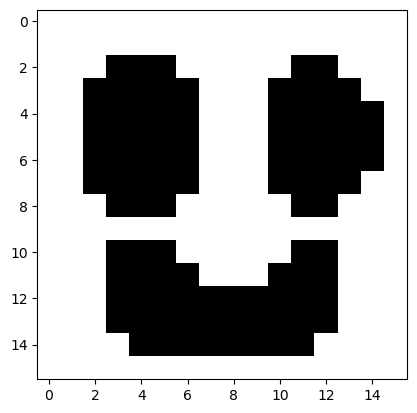

In [28]:
plt.imshow(val_arr1,cmap="gray")
plt.show()

In [29]:
## Let's find patches using bfs first and then dfs
num_of_patch,patch_coord_list=regioncount(val_arr1,solver="bfs")

In [30]:
print("Number of patches :",num_of_patch)

Number of patches : 3


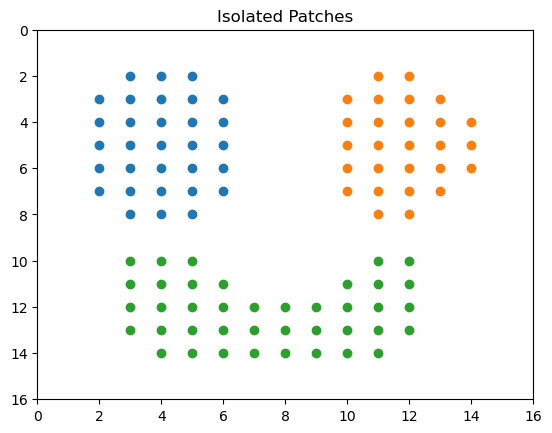

In [31]:
#since we have 3 patches
x1=[x[0] for x in patch_coord_list[0]]
y1=[x[1] for x in patch_coord_list[0]]
x2=[x[0] for x in patch_coord_list[1]]
y2=[x[1] for x in patch_coord_list[1]]
x3=[x[0] for x in patch_coord_list[2]]
y3=[x[1] for x in patch_coord_list[2]]
plt.scatter(y1,x1)
plt.scatter(y2,x2)
plt.scatter(y3,x3)
plt.xlim(0,  16)
plt.ylim(0, 16)
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Isolated Patches")
plt.show()

In [32]:
## Let's find patches using bfs first and then dfs
num_of_patch,patch_coord_list=regioncount(val_arr1,solver="dfs")
print("Number of patches :",num_of_patch)

Number of patches : 3


### Let's solve for Image 2 using regioncount function

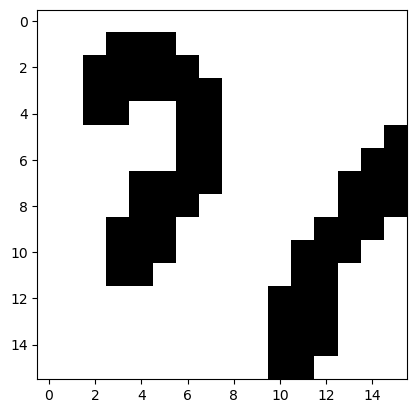

In [33]:
plt.imshow(val_arr2,cmap="gray")
plt.show()

In [34]:
## Let's find patches using bfs first and then dfs
num_of_patch,patch_coord_list=regioncount(val_arr2,solver="bfs")

In [35]:
print("Number of patches :",num_of_patch)

Number of patches : 2


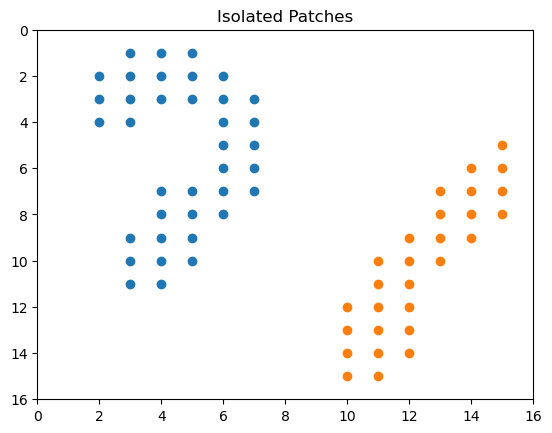

In [36]:
#since we have 3 patches
x1=[x[0] for x in patch_coord_list[0]]
y1=[x[1] for x in patch_coord_list[0]]
x2=[x[0] for x in patch_coord_list[1]]
y2=[x[1] for x in patch_coord_list[1]]
plt.scatter(y1,x1)
plt.scatter(y2,x2)
plt.xlim(0,  16)
plt.ylim(0, 16)
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
plt.title("Isolated Patches")
plt.show()

In [37]:
## Let's find patches using bfs first and then dfs
num_of_patch,patch_coord_list=regioncount(val_arr2,solver="dfs")
print("Number of patches :",num_of_patch)

Number of patches : 2
